<a href="https://colab.research.google.com/github/Milord5374/Play-Store-App-Review-Analysis/blob/main/Jason.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_excel("/content/Training_Data_Google_Play_reviews_6000.xlsx")

In [ ]:
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,userLang,app_id
0,495266a4-f451-48c3-a844-fb3c07560d55,Foysal Hossain,https://play-lh.googleusercontent.com/a-/ALV-U...,Gett van for no reason ðŸ˜‚ðŸ˜‚ðŸ˜‚,1,0,NaN,2023-09-19 15:05:31,NaN,NaT,NaN,EN,org.telegram.messenger
1,947fcd83-7a28-403d-b03b-d0bc20f52e0e,S K VERMA,https://play-lh.googleusercontent.com/a/ACg8oc...,better' than WhatsApp,4,0,NaN,2023-09-19 14:59:30,NaN,NaT,NaN,EN,org.telegram.messenger
2,65856211-67ba-4560-84dd-a0055775ed90,Amanuel Abara,https://play-lh.googleusercontent.com/a/ACg8oc...,That was good app for me,5,0,NaN,2023-09-19 14:55:06,NaN,NaT,NaN,EN,org.telegram.messenger
3,cd5ba250-3a26-43b4-a378-77d18f73a503,Vagarangas X Aopi,https://play-lh.googleusercontent.com/a/ACg8oc...,Love the app,5,0,10.0.4,2023-09-19 14:50:18,NaN,NaT,10.0.4,EN,org.telegram.messenger
4,e8e886b4-d6c6-416b-b0a1-be90320c4024,Shafin islam,https://play-lh.googleusercontent.com/a-/ALV-U...,ðŸ•³ï¸ðŸ•³ï¸ðŸ•³ï¸,1,0,NaN,2023-09-19 14:48:20,NaN,NaT,NaN,EN,org.telegram.messenger


In [ ]:
# Step 2: Basic Data Cleaning
# Convert reviewCreatedVersion and appVersion to strings to handle versions as categorical data
data['reviewCreatedVersion'] = data['reviewCreatedVersion'].astype(str)
data['appVersion'] = data['appVersion'].astype(str)

In [ ]:
# Fill missing values in 'content' with an empty string
data['content'] = data['content'].fillna('')

In [ ]:
# Step 3: Data Analysis
# 3.1 Calculate the average score
average_score = data['score'].mean()
print(f'Average Score: {average_score}')

Average Score: 3.2971666666666666


In [ ]:
# Check if 'reviewCreatedDate' exists and convert to datetime
if 'reviewCreatedDate' in data.columns:
    data['reviewCreatedDate'] = pd.to_datetime(data['reviewCreatedDate'], errors='coerce')

In [ ]:
# 3.2 Count the number of reviews per score
score_counts = data['score'].value_counts()
print('Number of Reviews per Score:')
print(score_counts)

Number of Reviews per Score:
score
5    2745
1    1905
4     500
3     453
2     397
Name: count, dtype: int64


In [ ]:
# 3.3 Find the most common issues mentioned in low-rated reviews (score <= 2)
low_rated_reviews = data[data['score'] <= 2]
common_issues = low_rated_reviews['content'].str.lower().str.split(expand=True).stack().value_counts().head(10)
print('Most Common Issues in Low-Rated Reviews:')
print(common_issues)

Most Common Issues in Low-Rated Reviews:
i        559
app      398
non      395
nicht    372
die      368
to       367
ich      353
a        351
the      331
in       312
Name: count, dtype: int64


In [ ]:
# 3.4 Distribution of reviews over time
if 'reviewCreatedDate' in data.columns:
    reviews_over_time = data.groupby(data['reviewCreatedDate'].dt.date).size()
    print('Number of Reviews Over Time:')
    print(reviews_over_time)

In [ ]:
# 3.5 Average score per app version
avg_score_per_version = data.groupby('appVersion')['score'].mean()
print('Average Score per App Version:')
print(avg_score_per_version)

Average Score per App Version:
appVersion
10.0.1           4.000000
10.0.2           3.866667
10.0.3           2.692308
10.0.4           3.080357
10.0.5           3.525926
                   ...   
9.7.5.1          5.000000
9.7.6            3.000000
98.0.0.18.71     1.000000
99.0.0.20.136    1.000000
nan              3.417082
Name: score, Length: 308, dtype: float64


In [ ]:
# 3.6 Average score per review created version
avg_score_per_review_version = data.groupby('reviewCreatedVersion')['score'].mean()
print('Average Score per Review Created Version:')
print(avg_score_per_review_version)

Average Score per Review Created Version:
reviewCreatedVersion
10.0.1           4.000000
10.0.2           3.866667
10.0.3           2.692308
10.0.4           3.080357
10.0.5           3.525926
                   ...   
9.7.5.1          5.000000
9.7.6            3.000000
98.0.0.18.71     1.000000
99.0.0.20.136    1.000000
nan              3.417082
Name: score, Length: 308, dtype: float64


<ipython-input-19-b876fc60e866>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='score', palette='viridis')


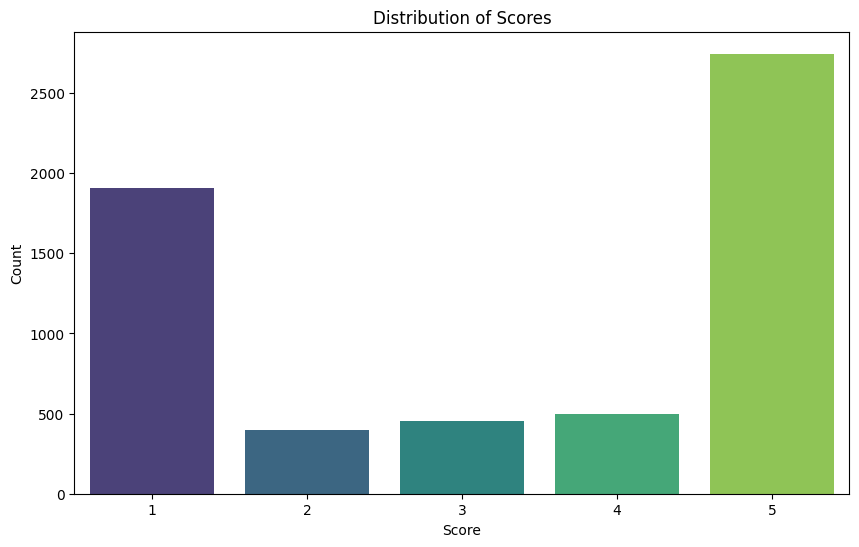

In [ ]:
# 2.1 Distribution of scores
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='score', palette='viridis')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()


<ipython-input-22-c50599524369>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_score_per_version, x='appVersion', y='score', palette='viridis')


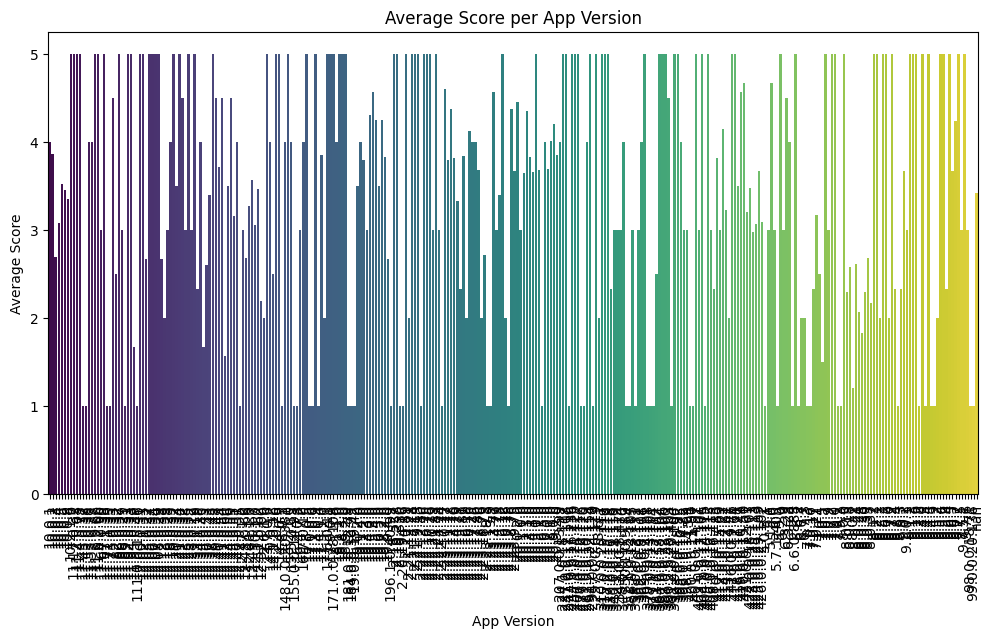

In [ ]:
# 2.3 Average score per app version
avg_score_per_version = data.groupby('appVersion')['score'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_score_per_version, x='appVersion', y='score', palette='viridis')
plt.title('Average Score per App Version')
plt.xlabel('App Version')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.show()


<ipython-input-25-c7d6faff09fe>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_score_per_review_version, x='reviewCreatedVersion', y='score', palette='viridis')


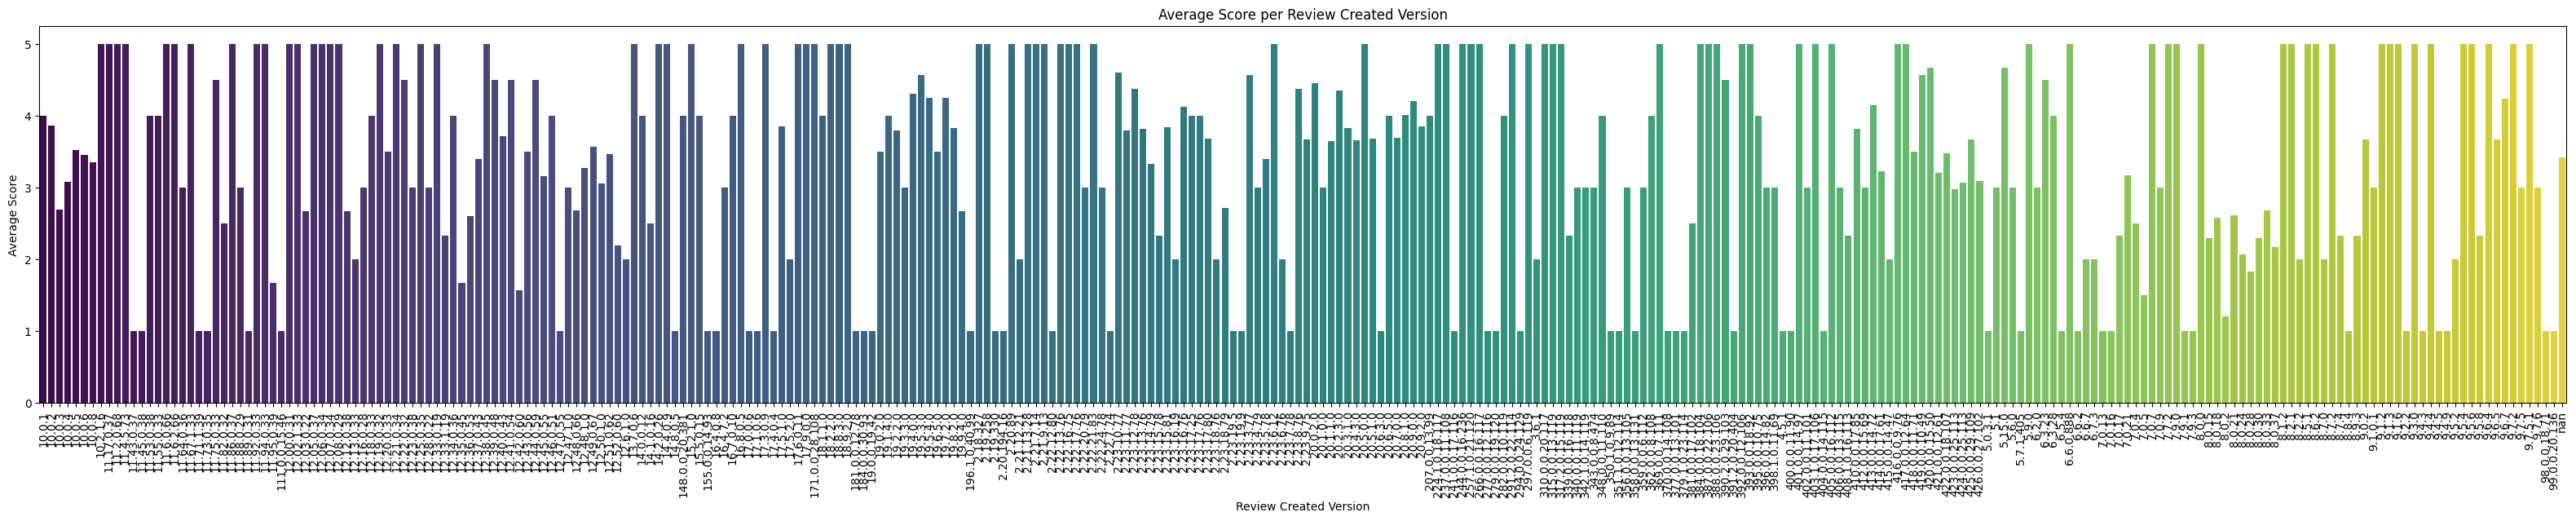

In [ ]:
# 2.4 Average score per review created version
avg_score_per_review_version = data.groupby('reviewCreatedVersion')['score'].mean().reset_index()
plt.figure(figsize=(40, 6))
sns.barplot(data=avg_score_per_review_version, x='reviewCreatedVersion', y='score', palette='viridis')
plt.title('Average Score per Review Created Version')
plt.xlabel('Review Created Version')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.show()

<ipython-input-24-5d076da2f1ec>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=common_issues.values, y=common_issues.index, palette='viridis')


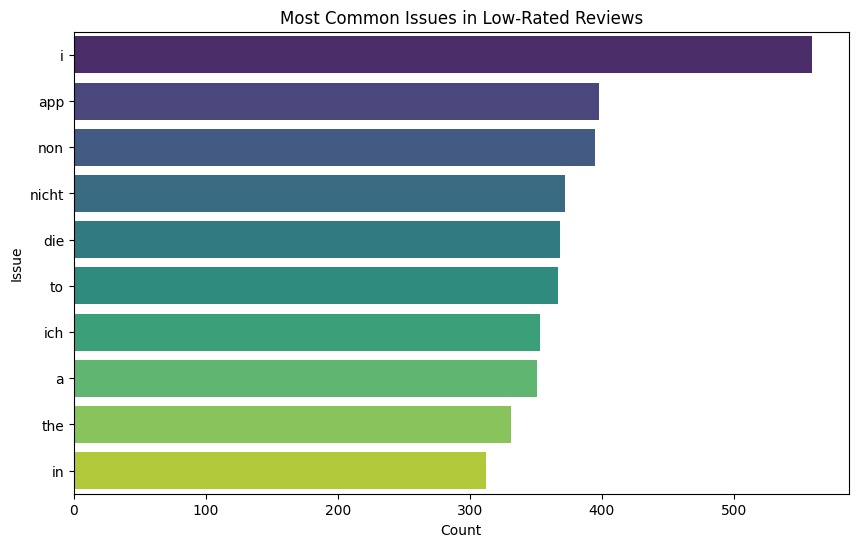

In [ ]:
# 2.5 Common issues in low-rated reviews
low_rated_reviews = data[data['score'] <= 2]
common_issues = low_rated_reviews['content'].str.lower().str.split(expand=True).stack().value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=common_issues.values, y=common_issues.index, palette='viridis')
plt.title('Most Common Issues in Low-Rated Reviews')
plt.xlabel('Count')
plt.ylabel('Issue')
plt.show()


The final analysis involves interpreting the visualizations generated and understanding the insights derived from them. Here is a step-by-step analysis based on the provided code:

### 1. Distribution of Scores
The distribution of scores helps us understand how users generally rate the app.

**Insights:**
- **Skewness**: If most reviews are clustered around higher scores (4 and 5), it indicates user satisfaction.
- **Spread**: A wider spread, especially towards lower scores, suggests issues that need addressing.

### 2. Reviews Over Time
This plot shows how the number of reviews changes over time.

**Insights:**
- **Trends**: Look for any spikes or drops in the number of reviews. Spikes might correlate with app updates or marketing campaigns, while drops might indicate periods of inactivity or user dissatisfaction.
- **Seasonality**: Identify any patterns that repeat periodically.

### 3. Average Score per App Version
This visualization indicates how different app versions are rated.

**Insights:**
- **Version Quality**: Identify which app versions received higher or lower ratings.
- **Impact of Updates**: Determine if updates improved user satisfaction or introduced new issues.

### 4. Average Score per Review Created Version
This plot shows the average score for each review created version.

**Insights:**
- **Consistency**: Check if there is consistency in user ratings across different review created versions.
- **User Experience**: Understand how changes in the app impacted user experience over time.

### 5. Common Issues in Low-Rated Reviews
This bar plot highlights the most frequently mentioned words in low-rated reviews.

**Insights:**
- **Key Issues**: Identify recurring problems users face, such as "crash", "bug", "slow", etc.
- **Focus Areas**: Prioritize fixing these issues to improve overall user satisfaction.

### Summary:
By analyzing these visualizations, you can derive several actionable insights:

1. **User Satisfaction**: Assess overall user satisfaction from the distribution of scores.
2. **Temporal Trends**: Understand how user engagement (through reviews) varies over time and identify any influencing factors.
3. **Version Performance**: Evaluate how different app versions are received by users and identify any problematic updates.
4. **User Feedback Consistency**: Check for consistency or variations in feedback over time and versions.
5. **Problem Areas**: Identify and address common issues mentioned in low-rated reviews to enhance user experience.

### Action Points:
1. **Address Recurring Issues**: Focus on the most common problems mentioned in low-rated reviews.
2. **Analyze Updates**: Investigate why certain app versions received lower scores and rectify those issues in future updates.
3. **Monitor Trends**: Keep an eye on temporal trends to correlate them with specific events or updates.
4. **Continuous Improvement**: Use the feedback to continuously improve the app and maintain high user satisfaction.

This analysis will help in making data-driven decisions to enhance the app and improve user satisfaction.